<a href="https://colab.research.google.com/github/BenyaminZojaji/Machine_Learning/blob/main/Assignment41/MLP-WeatherHistory/MLP_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from google.colab import drive 


In [2]:
wandb.login

<function wandb.sdk.wandb_login.login>

In [31]:
wandb.init(project="MLP-weather", entity="benyaminzojaji")

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,379
loss,11.23187


In [32]:
config = wandb.config
config.learning_rate = 0.001

### Load data

In [33]:
drive.mount('/content/gdrive')

data=pd.read_csv('gdrive/My Drive/Dataset/weatherHistory/weatherHistory.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Data cleansing

In [35]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].dt.year
data['DayOfYear'] = data['Formatted Date'].dt.dayofyear
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,DayOfYear
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,91


In [36]:
avgDayTemperature = data.groupby(['DayOfYear', 'Year'])['Temperature (C)'].mean().reset_index()
avgDayTemperature

,DayOfYear,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


### Visualization

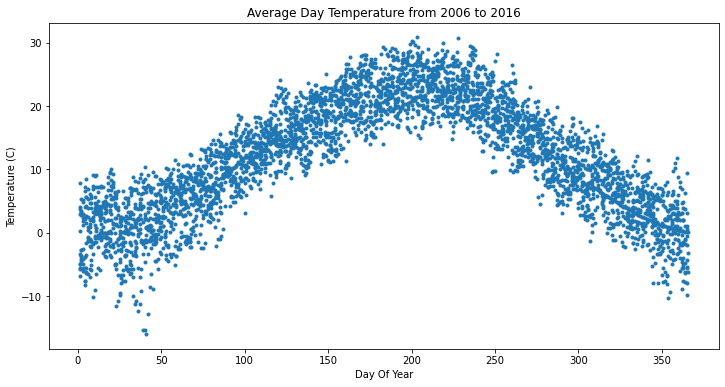

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(avgDayTemperature['DayOfYear'], avgDayTemperature['Temperature (C)'], marker='.')
plt.xlabel('Day Of Year')
plt.ylabel('Temperature (C)')
plt.title('Average Day Temperature from 2006 to 2016')
plt.show()

### normalize/scale

In [37]:
avgDayTemperature['Year'] = avgDayTemperature['Year'] - 2006

# transformer = Normalizer().fit(avgDayTemperature['DayOfYear'].values.reshape(-1,1))
# avgDayTemperature['DayOfYear'] = transformer.transform(avgDayTemperature['DayOfYear'].values.reshape(-1,1))

# transformer = Normalizer().fit(avgDayTemperature['Temperature (C)'])
# avgDayTemperature['Temperature (C)'] = transformer.transform(avgDayTemperature['Temperature (C)'])

# avgDayTemperature.head()

In [38]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(avgDayTemperature['Temperature (C)'].values.reshape(-1,1))
avgDayTemperature['Temperature (C)']=scaler.transform(avgDayTemperature['Temperature (C)'].values.reshape(-1,1))


In [39]:
avgDayTemperature.head()

,DayOfYear,Year,Temperature (C)
0,1,0,-0.893620
1,1,1,-0.924153
2,1,2,-2.001888
3,1,3,-1.909447
4,1,4,-0.468848


### test/train split

In [40]:
X = avgDayTemperature[['DayOfYear', 'Year']].values
Y = avgDayTemperature[['Temperature (C)']].values

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=24)

### Model

In [42]:
model = tf.keras.models.Sequential([
    Dense(512, input_dim=2, activation='relu'), #  
    Dense(128, activation='relu'),# tanh relu sigmoid
    Dense(64, activation='relu'),
    #Dense(32, activation='relu'),
    Dense(1, activation='linear') # OL sigmoid linear  softmax
])

In [43]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=config.learning_rate),
loss=tf.keras.losses.MeanSquaredError()
)

In [ ]:
model.summary()

In [44]:
model.fit(X_train, Y_train, epochs=800, callbacks=[WandbCallback()])

Epoch 1/800
101/101 [==============================] - 1s 3ms/step - loss: 15.8331
Epoch 2/800
101/101 [==============================] - 0s 3ms/step - loss: 1.9944
Epoch 3/800
101/101 [==============================] - 0s 3ms/step - loss: 1.3935
Epoch 4/800
101/101 [==============================] - 0s 3ms/step - loss: 1.0747
Epoch 5/800
101/101 [==============================] - 0s 3ms/step - loss: 1.0350
Epoch 6/800
101/101 [==============================] - 0s 3ms/step - loss: 0.8520
Epoch 7/800
101/101 [==============================] - 0s 3ms/step - loss: 0.7982
Epoch 8/800
101/101 [==============================] - 0s 3ms/step - loss: 0.7827
Epoch 9/800
101/101 [==============================] - 0s 3ms/step - loss: 0.7232
Epoch 10/800
101/101 [==============================] - 0s 3ms/step - loss: 0.6634
Epoch 11/800
101/101 [==============================] - 0s 3ms/step - loss: 0.6697
Epoch 12/800
101/101 [==============================] - 0s 3ms/step - loss: 0.6083
Epoch 13/800

### Evaluate

In [45]:
model.evaluate(X_test, Y_test)

26/26 [==============================] - 0s 2ms/step - loss: 0.1387


0.13873445987701416